<h1> Równania różniczkowe zwyczajne <h1>
<h3>Wprowadzenie do wszystkich zadań</h3>  
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 1</h3>

Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

<h3>Zad 2</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową.  Więcej informacji w ksiązce v1_web.pdf dołączonej do tego zadania.

Rozszerzenie: rozszerz symulację dla układu trzech ciał poruszających się w polu grawitacyjnym, 

* https://www.kwantowo.pl/2019/09/08/zagadka-ruchu-trzech-cial/

* https://arxiv.org/pdf/1508.02312.pdf

* https://www.wired.com/2016/06/way-solve-three-body-problem/

<h3>Zad3</h3>

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

<h3> Zad4</h3>

Zasymulować wahadlo magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

Rozszerzenie: Proszę narysować atraktor Duffinga - trajektorię $(x(t),y(t))$ na płaszczyźnie $(x,y)$ dla różnych wartości parametrów $a,b,k$. 


<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/


<h3>Zad6 (bez rozszerzeń-max 4 pkt)</h3>

Rozwiazać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiazaniem analitycznym 
$$u=e^{-\frac{t}{\tau}}$$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

<h3>Zad7 (bez rozszerzeń-max 4 pkt)</h3>

Zasymulować drgania sprężyny wg równania:
$$m\frac{d^2x}{dt}=-kx $$



# Zadanie 1

In [4]:
using Pkg
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
   8618.1 ms  ✓ DifferentialEquations
  1 dependency successfully precompiled in 11 seconds. 458 already precompiled.


## Metoda Eulera

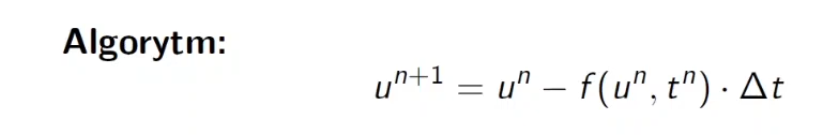


## Metoda Eulera nie-stabilna dla wahadla

In [ ]:
# Wahadło matematyczne – metoda Eulera
using Plots

# algorytm jest stabilny numeryczny jesli delta_t <= 2/(df/du), dlatego jesli wybierzemy
# dostatecznie male delta_t to algorytm jest stabilny, jesli natomiast ono bedzie za duze
# to algorytm bedzie niestabilny

function euler_pendulum(x0, v0, g, l, dt, t_end)
    N = Int(t_end / dt)
    t = zeros(Float64, N)
    x = zeros(Float64, N)
    v = zeros(Float64, N)

    x[1] = x0
    v[1] = v0

    for n in 1:N-1
        x[n+1] = x[n] + dt * v[n]
        v[n+1] = v[n] - dt * (g / l) * sin(x[n])
        t[n+1] = t[n] + dt
    end

    return t, x, v
end


euler_pendulum (generic function with 1 method)

#### Symulacja semi-stabilna - małe delta_t

### NOTE: metoda eulera daje bledny wynik - amplituda caly czas rosnie (co nie ma miejsca w wahadle) - jest to spodziewany efekt przy uzyciu tej metody
Zeby rozwiazac ten problem, trzeba na kazdym kroku dobierac odpowiednie delta_t w celu unikniecia niestabilnosci

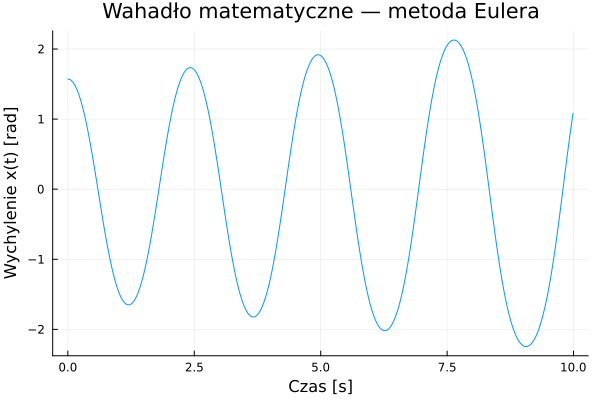

In [3]:
# Parametry
g = 9.81         # Przyspieszenie ziemskie
l = 1.0          # Długość wahadła
x0 = π / 2       # Początkowe wychylenie (duże wychylenie)
v0 = 0.0         # Początkowa prędkość
dt = 0.01        # Krok czasowy
t_end = 10.0     # Czas końcowy

# Symulacja
t, x, v = euler_pendulum(x0, v0, g, l, dt, t_end)

# Wykres
plot(t, x, xlabel="Czas [s]", ylabel="Wychylenie x(t) [rad]",
     title="Wahadło matematyczne — metoda Eulera", legend=false)

#### Symulacja nie-stabilna - małe delta

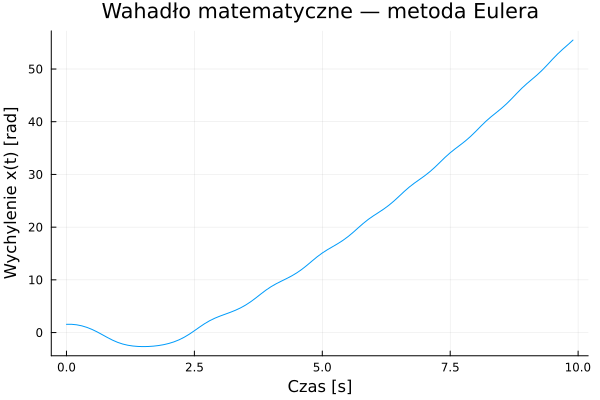

In [4]:
# Parametry
g = 9.81         # Przyspieszenie ziemskie
l = 1.0          # Długość wahadła
x0 = π / 2       # Początkowe wychylenie (duże wychylenie)
v0 = 0.0         # Początkowa prędkość
dt = 0.1        # Krok czasowy
t_end = 10.0     # Czas końcowy

# Symulacja
t, x, v = euler_pendulum(x0, v0, g, l, dt, t_end)

# Wykres
plot(t, x, xlabel="Czas [s]", ylabel="Wychylenie x(t) [rad]",
     title="Wahadło matematyczne — metoda Eulera", legend=false)

## Metoda eulera stabilna - dla wahadla

In [1]:
function euler_cromer_pendulum(x0, v0, g, l, dt, t_end)
    N = Int(t_end / dt)
    t = zeros(N)
    x = zeros(N)
    v = zeros(N)

    x[1] = x0
    v[1] = v0

    for n in 1:N-1
        # Najpierw aktualizujemy prędkość (przyspieszenie działa na nią)
        v[n+1] = v[n] - dt * (g / l) * sin(x[n])
        # Potem aktualizujemy pozycję używając już nowej prędkości
        x[n+1] = x[n] + dt * v[n+1]
        t[n+1] = t[n] + dt
    end

    return t, x, v
end

euler_cromer_pendulum (generic function with 1 method)

### Stabilna - małe delta_t

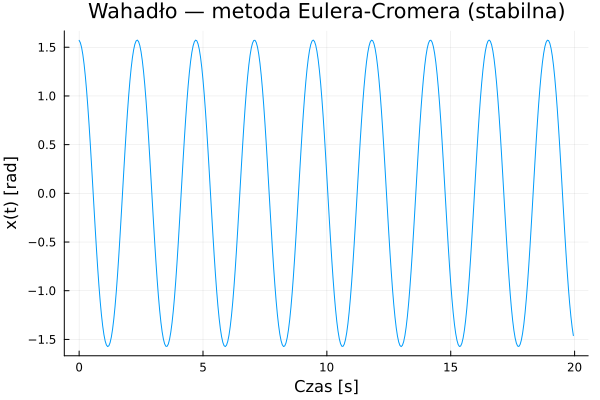

In [5]:
using Plots
# Parametry
g = 9.81
l = 1.0
x0 = π / 2
v0 = 0.0
dt = 0.05
t_end = 20.0

# Symulacja
t, x, v = euler_cromer_pendulum(x0, v0, g, l, dt, t_end)

# Wykres
plot(t, x, xlabel="Czas [s]", ylabel="x(t) [rad]",
     title="Wahadło — metoda Eulera-Cromera (stabilna)", legend=false)

### Nie-stabilna duze delta_t

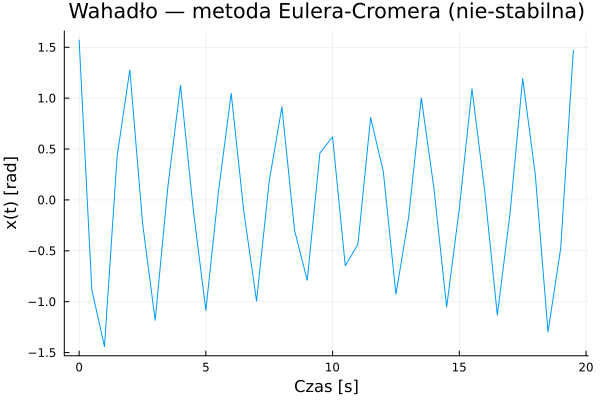

In [9]:
using Plots
# Parametry
g = 9.81
l = 1.0
x0 = π / 2
v0 = 0.0
dt = 0.5
t_end = 20.0

# Symulacja
t, x, v = euler_cromer_pendulum(x0, v0, g, l, dt, t_end)

# Wykres
plot(t, x, xlabel="Czas [s]", ylabel="x(t) [rad]",
     title="Wahadło — metoda Eulera-Cromera (nie-stabilna)", legend=false)

## Metoda Rungego-Kutty (4 stopnia)
Przyblizamy za pomoca szeregu Taylor'a. Decydujemy jak bardzo chcemy przyblizyc funkcję (jak daleko rozwinac szereg) i jak najmnijeszym kosztem obliczeniowym (oblicznie kolejnych pochodznych)

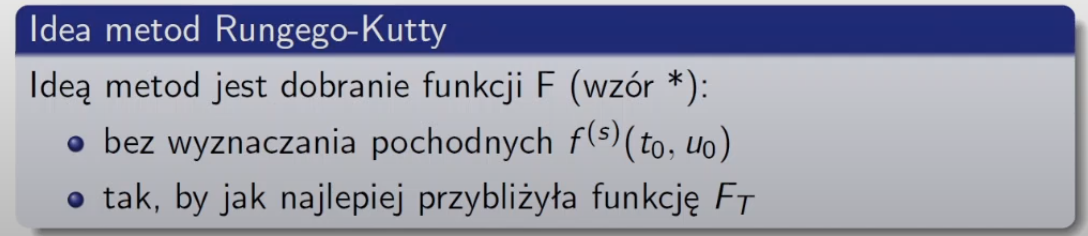

Wzór Rungego-Kutty dla r=4

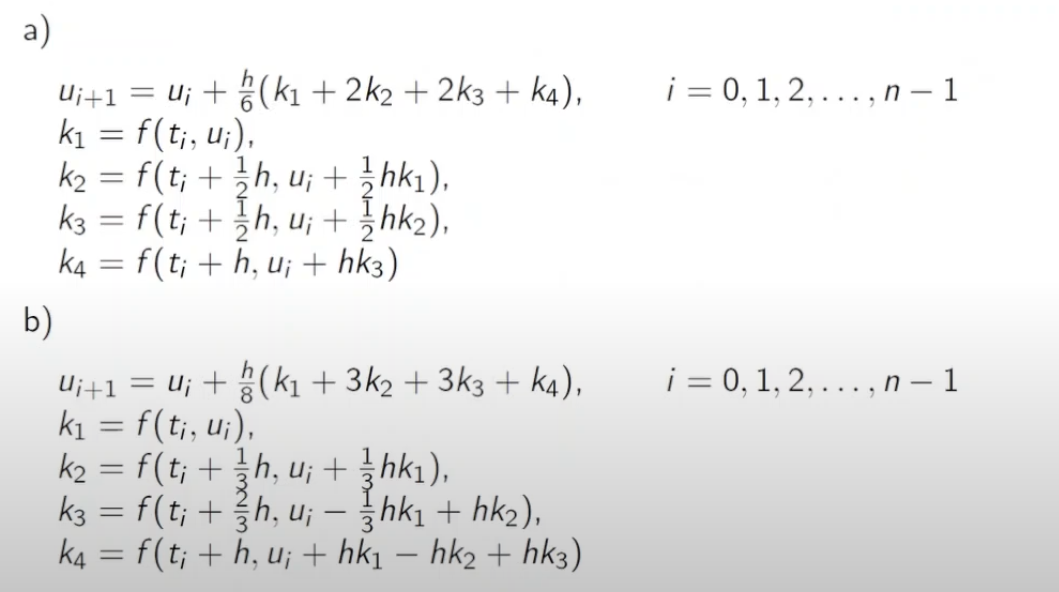

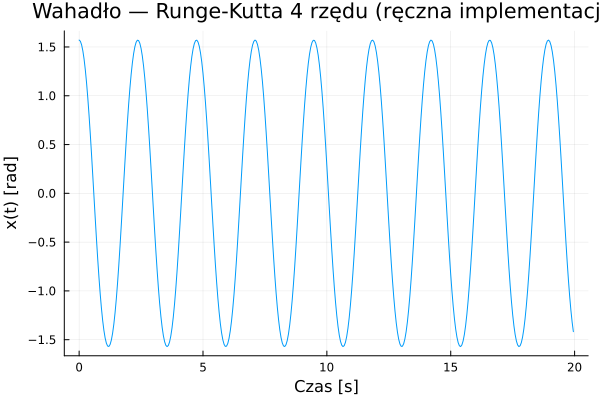

In [10]:
using Plots

function runge_kutta_4_pendulum(x0, v0, g, l, h, t_end)
    N = Int(t_end / h)
    t = zeros(N)
    x = zeros(N)
    v = zeros(N)

    x[1] = x0
    v[1] = v0

    for i in 1:N-1
        # u = [x, v], du = [v, -g/l * sin(x)]
        xi, vi = x[i], v[i]

        function f(u)
            return [u[2], - (g / l) * sin(u[1])]
        end

        u = [xi, vi]

        k1 = f(u)
        k2 = f(u .+ 0.5h .* k1)
        k3 = f(u .+ 0.5h .* k2)
        k4 = f(u .+ h .* k3)

        u_next = u .+ (h/6) .* (k1 .+ 2k2 .+ 2k3 .+ k4)

        x[i+1] = u_next[1]
        v[i+1] = u_next[2]
        t[i+1] = t[i] + h
    end

    return t, x, v
end

# Parametry symulacji
g = 9.81
l = 1.0
x0 = π / 2
v0 = 0.0
h = 0.05
t_end = 20.0

# Symulacja
t, x, v = runge_kutta_4_pendulum(x0, v0, g, l, h, t_end)

# Wykres
plot(t, x, xlabel="Czas [s]", ylabel="x(t) [rad]",
     title="Wahadło — Runge-Kutta 4 rzędu (ręczna implementacja)",
     legend=false)


## Animacja

┌ Info: Saved animation to /Users/jan/Library/CloudStorage/OneDrive-AkademiaGórniczo-Hutniczaim.StanisławaStaszicawKrakowie/university/mownit/lab11/wahadlo.gif
└ @ Plots /Users/jan/.julia/packages/Plots/uiCPf/src/animation.jl:156


Plots.AnimatedGif("/Users/jan/Library/CloudStorage/OneDrive-AkademiaGórniczo-Hutniczaim.StanisławaStaszicawKrakowie/university/mownit/lab11/wahadlo.gif")
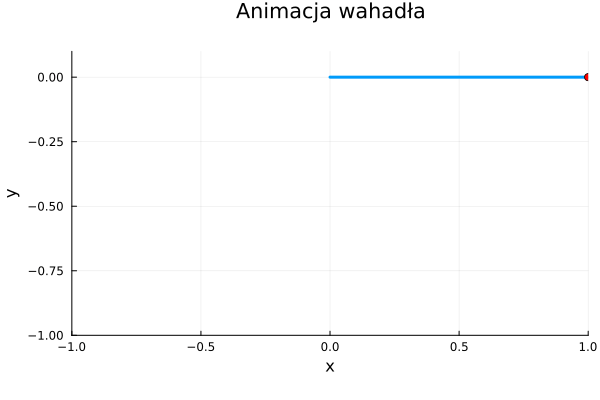

In [14]:
using Plots
# backend do animacji
gr()

function animate_pendulum(x, l; save_as="pendulum.gif", fps=5)
    n = length(x)
    anim = @animate for i in 1:5:n  # rzadziej, żeby było płynnie
        x_pos = l * sin(x[i])
        y_pos = -l * cos(x[i])

        plot([0, x_pos], [0, y_pos], lw=3, xlim=(-l, l), ylim=(-l, 0.1),
             xlabel="x", ylabel="y", title="Animacja wahadła", legend=false, aspect_ratio=1)
        scatter!([x_pos], [y_pos], color=:red)
    end

    gif(anim, save_as, fps=fps)
end

# Generuj animację
# Dane bierzemy z algorytmu RK4, z poprzedniego zadania
animate_pendulum(x, l; save_as="wahadlo.gif")


## Extra: Podwójne wahadło

┌ Info: Saved animation to /Users/jan/Library/CloudStorage/OneDrive-AkademiaGórniczo-Hutniczaim.StanisławaStaszicawKrakowie/university/mownit/lab11/double_pendulum.gif
└ @ Plots /Users/jan/.julia/packages/Plots/uiCPf/src/animation.jl:156


Plots.AnimatedGif("/Users/jan/Library/CloudStorage/OneDrive-AkademiaGórniczo-Hutniczaim.StanisławaStaszicawKrakowie/university/mownit/lab11/double_pendulum.gif")
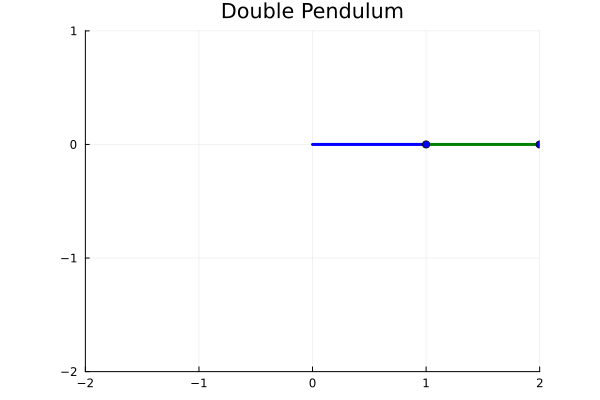

In [ ]:
# Modyfikacja RK4 z poprzedniego zadania, zeby dzialalo na podwojnym wahadle

function double_pendulum_derivatives(t, theta1, omega1, theta2, omega2, g, l)
    delta = theta2 - theta1
    denom = (2 - cos(delta)^2)

    dtheta1 = omega1
    dtheta2 = omega2

    domega1 = (
        -g * (2 * sin(theta1)) - sin(delta) * (omega2^2 * l + omega1^2 * l * cos(delta))
    ) / (l * denom)

    domega2 = (
        2 * sin(delta) * (
            omega1^2 * l + g * cos(theta1)
        )
    ) / (l * denom)

    return dtheta1, domega1, dtheta2, domega2
end

function rk4_double_pendulum(tspan, dt, theta1_0, omega1_0, theta2_0, omega2_0, g, l)
    t_steps = collect(tspan[1]:dt:tspan[2])
    n = length(t_steps)

    theta1 = zeros(n)
    omega1 = zeros(n)
    theta2 = zeros(n)
    omega2 = zeros(n)

    theta1[1] = theta1_0
    omega1[1] = omega1_0
    theta2[1] = theta2_0
    omega2[1] = omega2_0

    for i in 1:n-1
        t = t_steps[i]
        y = [theta1[i], omega1[i], theta2[i], omega2[i]]

        function f(y)
            dtheta1, domega1, dtheta2, domega2 = double_pendulum_derivatives(t, y[1], y[2], y[3], y[4], g, l)
            return [dtheta1, domega1, dtheta2, domega2]
        end

        k1 = dt * f(y)
        k2 = dt * f(y .+ 0.5 .* k1)
        k3 = dt * f(y .+ 0.5 .* k2)
        k4 = dt * f(y .+ k3)

        y_next = y .+ (1/6) .* (k1 .+ 2k2 .+ 2k3 .+ k4)

        theta1[i+1], omega1[i+1], theta2[i+1], omega2[i+1] = y_next
    end

    return t_steps, theta1, theta2
end

function animate_double_pendulum(theta1, theta2, l; save_as="double_pendulum.gif", fps=60)
    n = length(theta1)
    anim = @animate for i in 1:2:n
        x1 = l * sin(theta1[i])
        y1 = -l * cos(theta1[i])

        x2 = x1 + l * sin(theta2[i])
        y2 = y1 - l * cos(theta2[i])

        plot([0, x1], [0, y1], lw=3, color=:blue, xlim=(-2l, 2l), ylim=(-2l, 1),
             legend=false, aspect_ratio=1, title="Double Pendulum")
        plot!([x1, x2], [y1, y2], lw=3, color=:green)
        scatter!([x1, x2], [y1, y2], color=[:blue :red])
    end

    gif(anim, save_as, fps=fps)
end

# Example usage
g = 9.81
l = 1.0
tspan = (0.0, 20.0)
dt = 0.01

theta1_0 = pi / 2
omega1_0 = 0.0
theta2_0 = pi / 2
omega2_0 = 0.0

t, theta1, theta2 = rk4_double_pendulum(tspan, dt, theta1_0, omega1_0, theta2_0, omega2_0, g, l)
animate_double_pendulum(theta1, theta2, l; save_as="double_pendulum.gif")
